In [127]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend


In [128]:
df=pd.read_csv("book.csv",encoding="Unicode_escape")

In [129]:
df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [130]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [131]:
df=pd.get_dummies(df)

In [132]:
df

,Unnamed: 0,User.ID,Book.Rating,"Book.Title_ Jason, Madison &amp",Book.Title_ Other Stories;Merril;1985;McClelland &amp,Book.Title_ Repairing PC Drives &amp,Book.Title_'48,Book.Title_'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,Book.Title_...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,Book.Title_01-01-00: A Novel of the Millennium,"Book.Title_1,401 More Things That P*Ss Me Off",Book.Title_10 Commandments Of Dating,"Book.Title_100 Great Fantasy Short, Short Stories",Book.Title_1001 Brilliant Ways to Checkmate,Book.Title_101 Bright Ideas: Esl Activities for All Ages,Book.Title_101 Dalmatians,Book.Title_101 Essential Tips: House Plants,Book.Title_101 Telephone Jokes,Book.Title_101 Wacky Computer Jokes,Book.Title_101 Ways to Make Money at Home,Book.Title_11 Edward Street,Book.Title_11th Hour,Book.Title_13 99 Euros,"Book.Title_14,000 Things to Be Happy About",Book.Title_1984,Book.Title_1st to Die: A Novel,Book.Title_20 Jahre 40 bleiben. Jung und schÃ?Â¶n in den besten Jahren.,Book.Title_20 Years of Censored News,"Book.Title_20,000 Leagues Under the Sea (Wordsworth Collection)","Book.Title_20,001 Names for Baby",Book.Title_2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,Book.Title_2010: Odyssey Two,Book.Title_2061: Odyssey Three,Book.Title_22 Indigo Place,Book.Title_24 Hours,Book.Title_250 Things You Can Do to Make Your Cat Adore You,Book.Title_253,Book.Title_28 Barbary Lane : A \Tales of the City\ Omnibus,Book.Title_2nd Chance,Book.Title_3 Bowls : Vegetarian Recipes from an American Zen Buddhist Monastery,"Book.Title_3 Plays: Our Town, the Skin of Our Teeth, the Matchmaker (Perennial Classics)",Book.Title_30 Things Everyone Should Know How to Do Before Turning 30,Book.Title_30-Minute Meals,Book.Title_30: Pieces of a Novel,Book.Title_365 Easy Low-Calorie Recipes,Book.Title_365 Health and Happiness Boosters,Book.Title_4 Blondes,"Book.Title_40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)","Book.Title_5 Novels : Alan Mendelsohn, the Boy from Mars; Slaves of Spiegel; The Last Guru; Young Adult Novel; The Snarkout Boys and the Avocado of Death",Book.Title_50 Simple Things You Can Do to Save the Earth,Book.Title_500 palabras nuevas para ti / 500 Words To Grow On,Book.Title_66 Laps: A Novel,Book.Title_7b,Book.Title_8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,Book.Title_8 Weeks to Optimum Health,Book.Title_97 Ways to Make A Baby Laugh,Book.Title_99 francs: Roman,Book.Title_A 3rd Serving of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),Book.Title_A 4th Course of Chicken Soup for the Soul: 101 More Stories to Open the Heart and Rekindle the Spirit,Book.Title_A 6th Bowl of Chicken Soup for the Soul (Chicken Soup for the Soul),...,"Book.Title_You Again (Showcase) (Harlequin Superromance, No 698)",Book.Title_You Are My I Love You,Book.Title_You Are Not a Stranger Here,Book.Title_You Are Not a Stranger Here : Stories,Book.Title_You Be the Jury #02,Book.Title_You Belong To Me,Book.Title_You Can Be Happy No Matter What: Five Principles for Keeping Life in Perspective,Book.Title_You Can Surf the Net: Your Guide to the World of the Internet,Book.Title_You Can't Afford the Luxury of a Negative Thought (The Life 101 Series),Book.Title_You Can't Keep a Good Woman Down,Book.Title_You Cannot Be Serious,Book.Title_You Don't Need Experience if You've Got Attitude,Book.Title_You Read to Me &amp; I'll Read to You: Stories to Share from the 20th Century,"Book.Title_You'Ve Lost Your Marbles, Lickety Spilt",Book.Title_You're Fifty--Now What?: Investing for the Second Half of Your Life,Book.Title_You're Not a Kid Anymore When...,Book.Title_You're the One,Book.Title_Young Wives,Book.Title_Your Blue-Eyed Boy : A Novel,Book.Title_Your Blues Ain't Like Mine,Book.Title_Your Erroneous Zones,Book.Title_Your First Parakeet,"Book.Title_Your First Year in N

In [133]:
df = df.applymap(lambda x: 1 if x >= 0.5 else 0)

In [134]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(Unnamed: 0)
1,1.0,(User.ID)
2,1.0,(Book.Rating)
3,1.0,"(User.ID, Unnamed: 0)"
4,1.0,"(Book.Rating, Unnamed: 0)"
5,1.0,"(Book.Rating, User.ID)"
6,1.0,"(Book.Rating, User.ID, Unnamed: 0)"


In [135]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending=False)




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(User.ID),(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Unnamed: 0),(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Book.Rating),(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Unnamed: 0),(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Book.Rating),(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(User.ID),(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(Book.Rating, User.ID)",(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(Book.Rating, Unnamed: 0)",(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(User.ID, Unnamed: 0)",(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(Book.Rating),"(User.ID, Unnamed: 0)",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [136]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(User.ID),(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Unnamed: 0),(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Book.Rating),(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Unnamed: 0),(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Book.Rating),(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(User.ID),(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(Book.Rating, User.ID)",(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(Book.Rating, Unnamed: 0)",(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(User.ID, Unnamed: 0)",(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(Book.Rating),"(User.ID, Unnamed: 0)",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [137]:
rules[rules.lift>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(User.ID),(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(Unnamed: 0),(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(Book.Rating),(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(Unnamed: 0),(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(Book.Rating),(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
5,(User.ID),(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
6,"(Book.Rating, User.ID)",(Unnamed: 0),1.0,1.0,1.0,1.0,1.0,0.0,inf
7,"(Book.Rating, Unnamed: 0)",(User.ID),1.0,1.0,1.0,1.0,1.0,0.0,inf
8,"(User.ID, Unnamed: 0)",(Book.Rating),1.0,1.0,1.0,1.0,1.0,0.0,inf
9,(Book.Rating),"(User.ID, Unnamed: 0)",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [138]:
df1=pd.read_csv("my_movies.csv")

In [139]:
df1

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [140]:
df1=pd.get_dummies(df1)

In [141]:
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [142]:
frequent_itemsets = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V5_LOTR2, Green Mile, Harry Potter1..."
1393,0.1,"(V2_LOTR1, V5_LOTR2, Green Mile, V3_Harry Pott..."
1394,0.1,"(V2_LOTR1, V5_LOTR2, Green Mile, Harry Potter1..."
1395,0.1,"(V2_LOTR1, V5_LOTR2, Green Mile, Harry Potter1..."


In [143]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, LOTR2)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33437,"(V4_Green Mile, Sixth Sense, LOTR1)","(LOTR2, V2_LOTR1, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(LOTR2, V2_LOTR1, Sixth Sense)","(V4_Green Mile, Harry Potter1, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(V2_LOTR1, Sixth Sense, LOTR1)","(V4_Green Mile, Harry Potter1, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33417,"(V4_Green Mile, V2_LOTR1, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
229,(Gladiator),"(Sixth Sense, V1_Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
44,(Gladiator),(V1_Sixth Sense),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
45,(V1_Sixth Sense),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
1621,(Gladiator),"(Green Mile, Sixth Sense, V1_Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333


In [144]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V3_Harry Potter1, Sixth Sense, V5_LOTR2, LOTR2)","(Green Mile, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(V4_Green Mile, Sixth Sense, LOTR1)","(LOTR2, V2_LOTR1, Harry Potter1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(LOTR2, V2_LOTR1, Sixth Sense)","(V4_Green Mile, Harry Potter1, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V2_LOTR1, Sixth Sense, LOTR1)","(V4_Green Mile, Harry Potter1, V5_LOTR2, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V4_Green Mile, V2_LOTR1, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V4_Green Mile, V2_LOTR1, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(LOTR2, V2_LOTR1, LOTR1)","(V4_Green Mile, Harry Potter1, Sixth Sense, V5...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(Harry Potter1, Sixth Sense, V5_LOTR2)","(V4_Green Mile, V2_LOTR1, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(V4_Green Mile, Harry Potter1, V5_LOTR2)","(LOTR2, V2_LOTR1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(LOTR2, Harry Potter1, V5_LOTR2)","(V4_Green Mile, V2_LOTR1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [145]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(V3_Harry Potter1),"(V2_LOTR1, V5_LOTR2, Green Mile, Harry Potter1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(V4_Green Mile),"(V2_LOTR1, V5_LOTR2, Green Mile, Harry Potter1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64249,(LOTR2),"(V2_LOTR1, V5_LOTR2, Green Mile, Harry Potter1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64250,(LOTR1),"(V2_LOTR1, V5_LOTR2, Green Mile, Harry Potter1...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [146]:
import seaborn as sb
import matplotlib.pyplot as plt  


<AxesSubplot:ylabel='Count'>

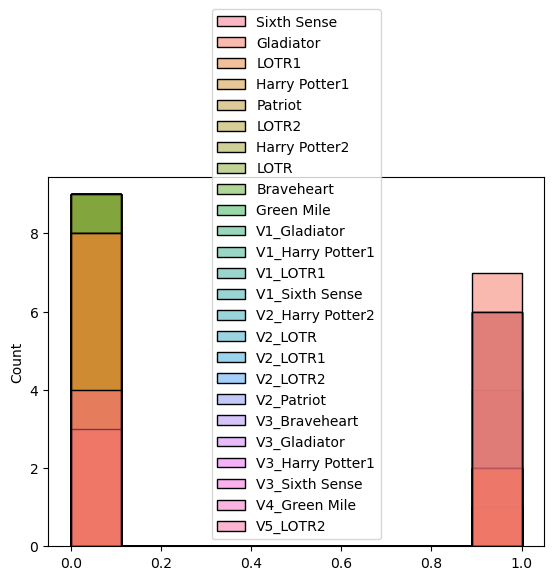

In [147]:
sb.histplot(df1)

<AxesSubplot:ylabel='Count'>

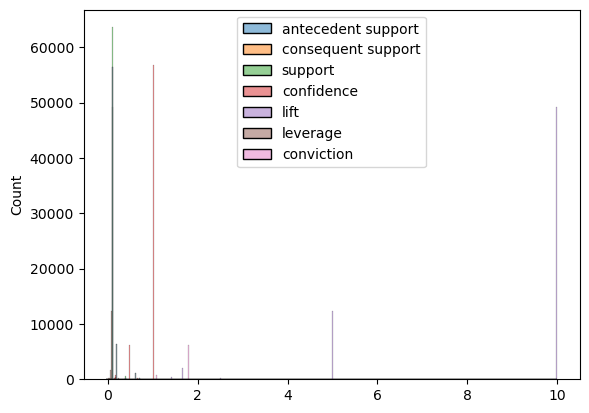

In [148]:
sb.histplot(rules)

<AxesSubplot:ylabel='Count'>

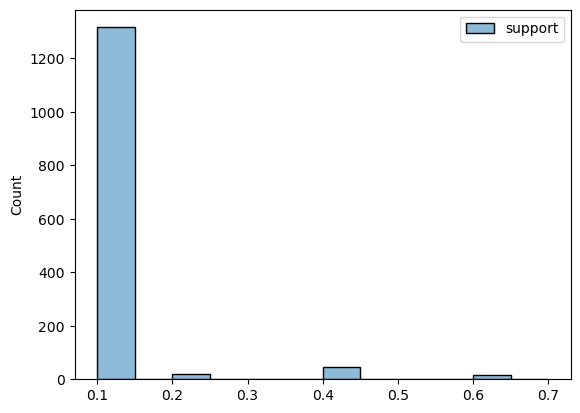

In [149]:
sb.histplot(frequent_itemsets)